In [24]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt

## Problem
Notice that the following result is not giving us $f(x) = x$. This is an issue.

In [ ]:
from math import sqrt

def f(x, nmax = 1000):
    for i in range(nmax):
        x = sqrt(x)
    for i in range(nmax):
        x = x**2
    return x

for xin in (5.0, 0.5):
    xout = f(xin)
    print(xin, xout)
    
print(2, f(2))

5.0 1.0
0.5 0.0
2 1.0


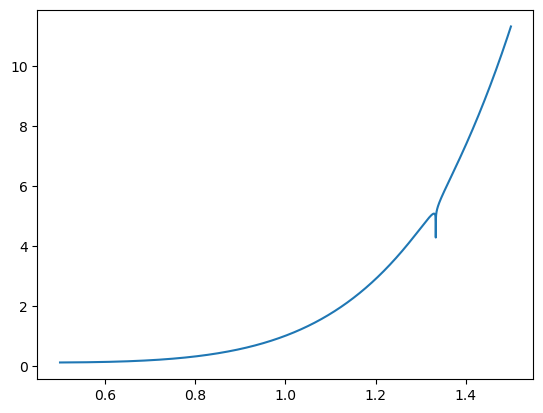

In [ ]:
n = 6
x = np.linspace(0.5, 1.5, 10**n)
f = x**6 + (0.1 * np.log(abs(1 + (3 * (1 - x)) )))

plt.plot(x,f) #, label="n=100")

Solving the standard quadratic equation:

$$ax^2 + bx + c = 0$$

where $a = 1, c = 1, b = 10^8$. Then, we see that the roots can be extremely large and involve subtracting two numbers that are close together. This can cause "catastrophic cancellation". We can deal with this by seeing that the product of the roots satisfy:

$$x_1 x_2 = \frac{c}{a} = 1$$

in our case, meaning that we can use this to avoid catastrophic cancellation. Let us pick the root that is larger, which we know is close to $-10^8$:

In [ ]:
# Regula Falsi Method
def RegulaFalsiMethod(func, a, b, err) -> float:
    # Takes a real-valued function, an interval where it crosses the x-axis, and a desired error from 0 to output a value close to the zero of the function
    a_eval = func(a)
    b_eval = func(b)
#     print("a_eval:", a_eval, "b_eval:", b_eval) # Debug
    # Edge cases
    if a_eval == 0:
        return a
    elif b_eval == 0:
        return b
    elif a_eval * b_eval > 0:
        return None
    
    low = a
    high = b
    c = (low*func(high) - high*func(low))/(func(high) - func(low))
    c_eval = func(c)
    low_eval = func(low)
    high_eval = func(high)
    while(abs(c_eval) > 10**(-err-1)):
        if (func(c) * low_eval < 0):
            high = c          
        elif (c_eval * high_eval < 0):
            low = c
        else:
            return c
        
        low_eval = func(low)
        high_eval = func(high)
        if func(high) - func(low) == 0:
            return None
        c = (low*func(high) - high*func(low))/(func(high) - func(low))
        c_eval = func(c)
        
    
    return c

# Newton's Method
def NewtonsMethod(func, derv, x_0, err) -> float:
    # Uses Newton's Method of finding roots. Has quadratic convergence time (versus log convergence)
    fun_eval = func(x_0)
    der_eval = derv(x_0)
#     print("fun_eval:", fun_eval, "der_eval:", der_eval) # Debug
    # Edge cases
    if fun_eval == 0:
        return x_0
    elif der_eval == 0:
        return None
    
    x_n = x_0
    x_n1 = x_n - (fun_eval/der_eval)
    while(abs(fun_eval) > 10**(-err)):
        fun_eval = func(x_n1)
        der_eval = derv(x_n1)
#         print("f(x_n+1) =", fun_eval, "\t f'(x_n+1) =", der_eval) # updating x-vals - Debug
#         print("f(x_n+1) =", fun_eval, "\t f'(x_n+1) =", der_eval) # updating f and f' - Debug
        if der_eval == 0:
            return None
        
        x_n = x_n1
        x_n1 = x_n - (fun_eval/der_eval)
        
    return x_n1


def func(x: float) -> float:
    val = x**2 + 1 + (10**8 * x)
    return val

def derv(x: float) -> float:
    val = 2*x + 10**8
    return val

RFroot = RegulaFalsiMethod(func, -1 * 10**8, -1 * 10**7, 6)
print("Regula Falsi Method... \t Root 1:", RFroot, "Root 2:", (1 / RFroot))

NWroot = NewtonsMethod(func, derv, 10**8, 6)
print("Newton's Method... \t Root 1:", NWroot, "Root 2:", (1 / NWroot))
# Newton's Method diverges when trying to find the smaller root.

Regula Falsi Method... 	 Root 1: -100000000.0 Root 2: -1e-08
Newton's Method... 	 Root 1: -1e-08 Root 2: -100000000.0


# Numerical Differentiation
We start with the simple formula

$$f'(x) \approx \frac{f(x + h) - f(x)}{h}$$

for some small $h > 0$. Since we know that

$$f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

we understand that this can be an approximation to this value, where if we can understand the function

$$df(x, h) = \frac{f(x + h) - f(x)}{h}$$

for some fixed $x$, then we get that properties like monotonicity or bounds will help us understand our approximation to the derivative.

Remark. We are actually approximating the tangent line via a secant line. As our secant line gets tighter, it will converge to the tangent line.

In [5]:
def FirstDeriv(f,a,b,N):
    x = np.linspace(a,b,N+1)
    h = x[1] - x[0]
    df = np.array([ (f(x[1:]) - f(x[0:-1])) / h ])
    return df

# Some more Differentiation Formulae
Let $f$ be a smooth function on $\mathbb{R}$ or $\mathbb{C}$. Then we know that for some $x_0$ in the domain of $f$, we may approximate $f(x)$ for some $x$ within a distance to $x_0$ via a Taylor series:

$$f(x) = f(x_0) + \sum_{n = 1}^{\infty} \frac{f^{(n)}(x_0) (x - x_0)^n}{n!} = f(x_0) + \frac{f^{(1)}(x_0) (x - x_0)}{1} + \frac{f^{(2)}(x_0) (x - x_0)^2}{2} + \frac{f^{(3)}(x_0) (x - x_0)^3}{6} + \cdots$$

Now, if we replace $x$ with $x + h$, and $x_0$ with $x$, we get

$$f(x + h) = \sum_{n = 0}^{\infty} \frac{f^{(n)}(x) h^n}{n!} = f(x) + f^{(1)}(x) h + \frac{f^{(2)}(x) h^2}{2} + \frac{f^{(3)}(x) h^3}{6} + \cdots$$

We can solve for $f'(x)$ in this equation to give us

$$f^{(1)}(x) = \frac{f(x + h) - f(x)}{h} - \frac{f^{(2)}(x) h}{2} + \frac{f^{(3)}(x) h^2}{6} + \cdots$$

which turns into

$$f^{(1)}(x) = \frac{f(x + h) - f(x)}{h} - \sum_{n = 1}^{\infty} \frac{f^{(n+1)}(x) h^n}{(n+1)!}\\ =  \frac{f(x + h) - f(x)}{h} + \mathcal{O}(h)$$

giving us a higher order approximation of $f^{(1)}(x)$ in case we cannot shrink our $h$. This is nice because this is an equality, and is true for any $|h| > 0$ such that $B(x, h)$ is contained in the domain of convergence of the Taylor Series. Notice, however, that this method requires us to know the higher derivatives of $f$. This equation can perhaps be useful when we are trying to prove results about the derivative of $f$ if we assume $f$ is smooth (i.e. suppose $f$ has vanishing derivatives for all derivatives above some $n$. Is this possible under some additional conditions on $f$? Alternatively, what if $x$ is a critical point of $f$? Then, we have a formula for computing the rest of the terms of the Taylor series around $x$, as well as a valid way of computing their actual values, see below:)

$$\frac{f(x + h) - f(x)}{h} = \sum_{n = 1}^{\infty} \frac{f^{(n+1)}(x) h^n}{(n+1)!},$$

so

$$f(x + h) = f(x) + \frac{f(x + h) - f(x)}{h} \\= \frac{f(x + h) + (h - 1) f(x)}{h}$$


## Acceptable Negligence
If we say that we can ignore all terms of size bounded above by $h^k$ for some positive integer $k$, then we see that

$$f^{(1)}(x) = \frac{f(x + h) - f(x)}{h} - \sum_{n = 1}^{\infty} \frac{f^{(n+1)}(x) h^n}{(n+1)!}\\ =  \frac{f(x + h) - f(x)}{h} - \sum_{n = 1}^{k} \frac{f^{(n+1)}(x) h^n}{(n+1)!} + \mathcal{O}(h^{k +1})$$

which gives us a sufficiently good approximation.

In [2]:
# First Derivatives: h and h^2
for_first_derv = lambda func, x, h: (func(x + h) - func(x)) / h
back_first_derv = lambda func, x, h: (func(x) - func(x - h)) / h
central_first_derv = lambda func, x, h: (func(x + h) - func(x - h)) / (2*h)

In [3]:
# Second Derivatives: h and h^2
for_second_derv = lambda func, x, h: (func(x + 2*h) - 2*func(x + h) + func(x)) / (h**2)
back_second_derv = lambda func, x, h: (func(x) - 2*func(x - h) + func(x - 2*h)) / (h**2)
central_second_derv = lambda func, x, h: (func(x + h) + func(x - h) - 2*func(x)) / (2*h**2)

In [4]:
# Third Derivatives: h and h^2
for_third_derv = lambda func, x, h: (func(x + (3*h)) - (3*func(x + (2*h))) + (3*func(x + h)) - func(x))/(h**3)
back_third_derv = lambda func, x, h: (func(x) - (3*func(x - h)) + (3*func(x - (2*h))) - func(x - (3*h)))/(h**3)
central_third_derv = lambda func, x, h: (func(x + (2*h)) - func(x - (2*h)) - 2*(func(x + h) - func(x - h)) )/(2*(h**3))

# Integration

## Trapezoid Rule
This method has $O(h^3)$ error, for $h = \frac{a-b}{2}$, as we have for $I = \int_{a}^{b} f(x)dx$ can be approximated by

$$I = (b-a)\frac{f(a) + f(b)}{2} + E$$

where

$$E = \frac{-1}{12} f^{(2)}(\zeta)(b-a)^3$$

for some $a < \zeta < b$.

In [6]:
# Integration Code - Trapezoid Method
def forward_trap_integrator(func, a : float, b : float, n : float) -> float:
    h = abs(b-a)/n
    x = a
    sum = 0
    while(x < b):
        sum += (0.5*h)*(func(x) + func(x + h))
        x += h

    return sum

f = lambda x: x**2

rel_errors = []
for i in range(1, 6):
    est = forward_trap_integrator(func=f, a=0, b=3, n=i)
    rel_err = 100*abs(est-9)/9
    rel_errors.append(rel_err)
    if (i == 1):
        print(f'Value of n: {i}, \t Estimated Value: {est} \t Relative Error: {rel_errors[i-1]}%')
    if (i > 1):
        print(f'Value of n: {i}, \t Estimated Value: {est} \t Relative Error: {rel_errors[i-1]}%, \t Decrease in Error: {rel_errors[i-2]/rel_errors[i-1]}')

Value of n: 1, 	 Estimated Value: 13.5 	 Relative Error: 50.0%
Value of n: 2, 	 Estimated Value: 10.125 	 Relative Error: 12.5%, 	 Decrease in Error: 4.0
Value of n: 3, 	 Estimated Value: 9.5 	 Relative Error: 5.555555555555555%, 	 Decrease in Error: 2.25
Value of n: 4, 	 Estimated Value: 9.28125 	 Relative Error: 3.125%, 	 Decrease in Error: 1.7777777777777777
Value of n: 5, 	 Estimated Value: 9.18 	 Relative Error: 1.999999999999997%, 	 Decrease in Error: 1.5625000000000024


## Simpson's Rule

This is a higher order approximation for the area under a curve. While we fit linear lines for the trapezoid method, here we fit a quadratic equation. Let $I$ be defined as before. Then, we may approximate $I$ as

$$I  = \frac{h}{3} [f(x_0) + 4f(x_1) + f(x_2)] + E$$

where

$$E = \frac{-1}{90}h^5 f^{(4)}(\zeta) = \frac{(a - b)^5}{2880} f^{(4)}(\zeta)$$

for $h = \frac{b - a}{2}$. This has error of the order $O(h^5)$. We can chain these together to integrate over a large region. This can give a large, clean expression as we had in the trapezoidal rule.

In [14]:
# Simpson's 1/3 rule
def simpson_1(func, a, b, n = 100):
    if (n % 2 == 1): # Edge case: when n is odd
        n = n + 1

    x = a
    h = (b - a) / n
    s = func(a) + func(b)
    for i in range(1, n):
        x = x + h

        if (i % 2 == 1):
            s = s + 4 * func(x)
        else:
            s = s + 2 * func(x)
    return s * (h/3)

In [39]:
print(simpson_1(lambda x: x**3, 0, 1, 100))

0.25000000000000044


In [27]:
# a more efficient implementation of simpson's rule
def simpson_2(func, a, b, n=100):
    if (n % 2 == 1): # Edge case: when n is odd
        n = n + 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1) # need to add one extra point since linspace takes number of points, not number of segments
    y = func (x)
    return (h / 3) * (y[0] + (4 * np.sum(y[1: -1: 2])) + (2 * np.sum(y[2: -1: 2])) + y[-1])

In [38]:
print(simpson_2(lambda x: x**3, 0, 1, 100))

0.25


## Normal Distribution

Let us try and integrate the normal distribution, a function that cannot be integrated analytically.

$$\frac{1}{\sqrt{2 \pi} \sigma} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$$

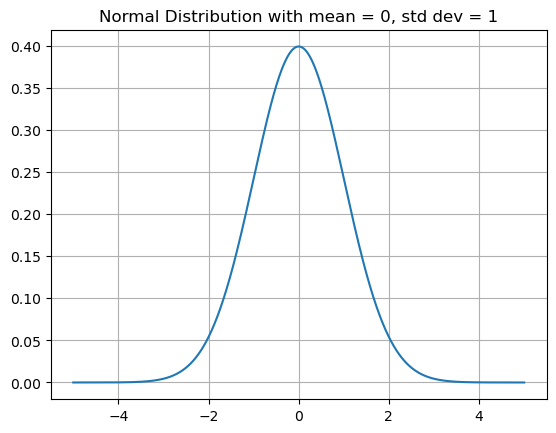

Integral from -1000 to 1000, using the fact that this distribution is symmetric: 1.0
Integral from -0.4 to 0.6, using the fact that this distribution is symmetric: 0.38116862386025063


In [60]:
normal = lambda x, mu=0, sigma=1: (np.exp(-1 * (x - mu)**2 / (2 * sigma**2)))/(np.sqrt(2 * np.pi) * sigma)
x = np.linspace(-5, 5, 10000)
y = normal(x, mu=0, sigma=1)
plt.plot(x,y)
plt.title("Normal Distribution with mean = 0, std dev = 1")
plt.grid()
plt.show()
print("Integral from -1000 to 1000, using the fact that this distribution is symmetric:", 2*simpson_2(normal, 0, 1000, 100000))
print("Integral from -0.4 to 0.6, using the fact that this distribution is symmetric:", 2*simpson_2(normal, 0, 0.4, 2000) + simpson_2(normal, 0.4, 0.6, 1000))

In [61]:
# Define an array of cumulative sums
def trap_cumulative(x, y):
    n = len(x)
    s = np.zeros(n)
    for k in range(1, n):
        s[k] = s[k - 1] + (x[k] - x[k - 1])*(y[k] + y[k-1])/2
    
    return s

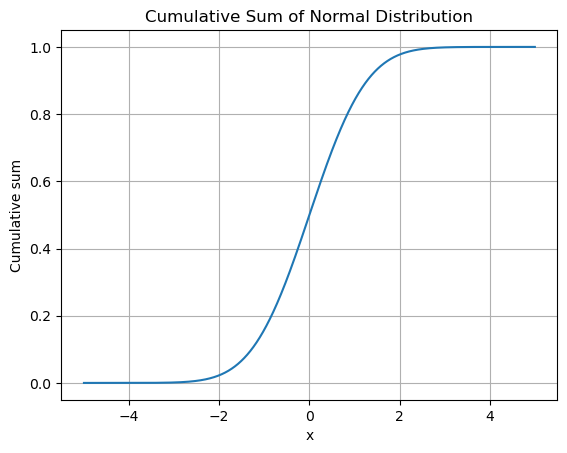

In [65]:
# plot the cumulative function
x = np.linspace(-5, 5, 10000)
y = normal(x, mu=0, sigma=1)
s = trap_cumulative(x=x, y=y)

plt.plot(x, s)
plt.xlabel("x")
plt.ylabel('Cumulative sum')
plt.grid()
plt.title("Cumulative Sum of Normal Distribution")
plt.show()